**Richter Jordaan Pset5**

**Question 1**

Question 1.1)

In [1]:
function euler_SIR(beta,gamma,S0,I0,R0,h,T)
    #x_(n+1) = x_n + h*f(x_n)
    
    s_vals = [S0]
    i_vals = [I0]
    r_vals = [R0]
    t_vals = [0.0]
      
    steps = floor(Int, T/h)
    for i in 1:steps
        push!(s_vals, s_vals[i]+h*dSdt(beta,s_vals[i],i_vals[i]))
        push!(i_vals,i_vals[i]+h*dIdt(beta,s_vals[i],i_vals[i],gamma))
        push!(r_vals,r_vals[i]+h*dRdt(gamma,i_vals[i]))
        push!(t_vals,t_vals[i]+h)
    end
    
    return s_vals,i_vals,r_vals,t_vals
end

euler_SIR (generic function with 1 method)

helper functions for each differential equation:

In [2]:
function dSdt(beta,S,I)
    return -beta*S*I
end

dSdt (generic function with 1 method)

In [3]:
function dIdt(beta,S,I,gamma)
    return beta*S*I-gamma*I
end

dIdt (generic function with 1 method)

In [4]:
function dRdt(gamma,I)
    return gamma*I
end

dRdt (generic function with 1 method)

Question 1.2)

In [5]:
beta = 0.1
gamma = 0.05
S0 = 0.99
I0 = 0.01
R0 = 0.0
T = 300
h = 0.1

res = euler_SIR(beta,gamma,S0,I0,R0,h,T)
res[2]

3001-element Array{Float64,1}:
 0.01
 0.010049
 0.01009823015149
 0.010147691436754711
 0.010197384841284065
 0.010247311353773344
 0.010297471966123151
 0.010347867673439268
 0.010398499474032362
 0.010449368369417561
 0.010500475364313885
 0.010551821466643532
 0.01060340768753103
 ⋮
 0.0007599737091609326
 0.0007576939302748401
 0.0007554209787810811
 0.0007531548343023925
 0.0007508954765219142
 0.0007486428851830126
 0.0007463970400891048
 0.0007441579211034827
 0.0007419255081491384
 0.000739699781208589
 0.0007374807203237036
 0.0007352683055955283

In [6]:
using Plots

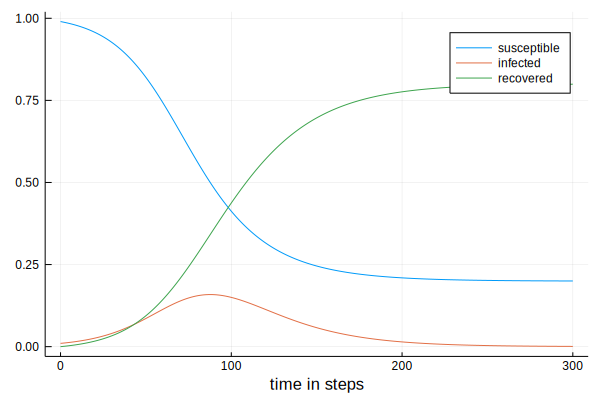

In [7]:
plot(res[4],res[1],label = "susceptible")
plot!(res[4],res[2], label = "infected")
plot!(res[4],res[3], label = "recovered",xlabel = "time in steps")

Question 1.3)

Yes, I see the standard SIR model with an outbreak that then weakens out over time. Not everyone gets infected. 

Question 1.4)

In [8]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4372489896215082695\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12870004272846866160\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4372489896215082695\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [9]:
@manipulate for beta in slider(0:0.1:1, value=0.1), gamma in slider(0:0.05:1, value=0.05)
    res = euler_SIR(beta,gamma,S0,I0,R0,h,T)
    plot(res[4],res[1],label = "susceptible")
    plot!(res[4],res[2], label = "infected")
    plot!(res[4],res[3], label = "recovered",xlabel = "time in steps")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 11,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
2, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000012fee7cd0, Task (runnable) @0x000000012fee7cd0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"7868806112526531471\",\"id\":\"ob_03\",\"type\":\"obse

it seems like outbreaks happen when beta is greater than gamma, but for small values of beta, outbreaks will happen when they are about equal.

**Question 2**

Question 2.1)

In [10]:
function deriv(f, a, h=0.001)
    return (f(a+h)-f(a))/h
end

deriv (generic function with 2 methods)

Question 2.2)

In [11]:
function tangent_line(f,x,a)
    return f(a)+deriv(f,a)*(x-a)
end

tangent_line (generic function with 1 method)

Question 2.3)

In [12]:
f = x -> x^3-2*x

@manipulate for a in -10:10
    plot(f,label = "f(x)")
    tan_line = x -> tangent_line(f,x,a)
    plot!(tan_line,label="tangent line")
end


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 10,:min => -10,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
0, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001173aaf50, Task (runnable) @0x00000001173aaf50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-10\",\"-9\",\"-8\",\"-7\",\"-6\",\"-5\",\"-4\",\"-3\",\"-2\",\"-1\",\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"1781

Question 2.4)

In [13]:
function dx(f,a,b)
    return (f(a+h,b)-f(a,b))/h
end

dx (generic function with 1 method)

In [14]:
function dy(f,a,b)
    return (f(a,b+h)-f(a,b))/h
end

dy (generic function with 1 method)

Question 2.5)

In [15]:
function gradient(f,a,b)
    return (dx(f,a,b),dy(f,a,b))
end

gradient (generic function with 1 method)

**Question 3**

Question 3.1)

In [16]:
function gradient_descent_1d(f,x0)
    eta = 0.01
    steps = 100
    
    loc = [x0]
    for i in 2:steps
        d = deriv(f,loc[i-1])
        push!(loc,loc[i-1] - (d/abs(d))*eta)
    end
    return loc
end

gradient_descent_1d (generic function with 1 method)

a better way of doing this would be to find critical points, classify it as a min, and then go there. or you
could find when the deriv is 0, which would mean that you're at a critical point.

Question 3.2)

In [17]:
f = x -> x^4 + 3*x^3 -3*x + 5

res = gradient_descent_1d(f,0.0)

100-element Array{Float64,1}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.060000000000000005
 0.07
 0.08
 0.09
 0.09999999999999999
 0.10999999999999999
 0.11999999999999998
 ⋮
 0.5200000000000002
 0.5100000000000002
 0.5200000000000002
 0.5100000000000002
 0.5200000000000002
 0.5100000000000002
 0.5200000000000002
 0.5100000000000002
 0.5200000000000002
 0.5100000000000002
 0.5200000000000002
 0.5100000000000002

In [18]:
@manipulate for step in slider(1:100, value=1)
    plot(f, label = "f(x)")
    ylims!(0,25)
    yvals = [f(res[i]) for i in 1:step]
    plot!(res[1:step],yvals[1:step],m=:o, label = "gradient descent")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001173a9690, Task (runnable) @0x00000001173a9690), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\

we can find different local minima by finding all points such that the first derivative = 0 and the 
second derivative is is positive.

In [19]:
function gradient_descent_2d(f,x0,y0,num_steps=100)
    eta = 0.01
    steps = num_steps
    
    loc = [(x0,y0)]
    for i in 2:steps
        grad = gradient(f,loc[i-1][1],loc[i-1][2])
        
        scale_factor = sqrt(grad[1]^2+grad[2]^2)
        
        new_loc = (loc[i-1][1]-eta*grad[1]/scale_factor,loc[i-1][2]-eta*grad[2]/scale_factor)
        push!(loc,new_loc)
    end
    return loc
end

gradient_descent_2d (generic function with 2 methods)

Question 2.4)

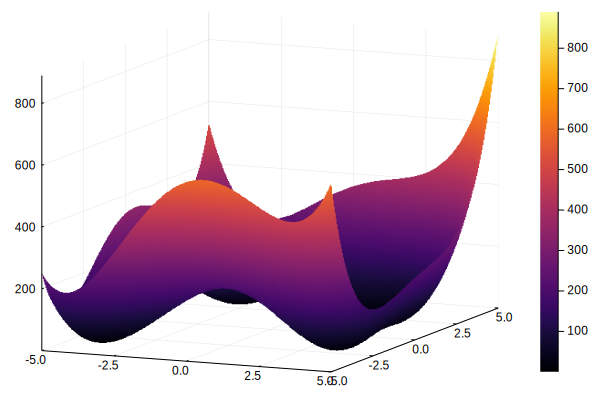

In [20]:
f = (x,y) -> (x^2+y-11)^2+(x+y^2-7)^2

res = gradient_descent_2d(f,2.5,-2.5)

x=range(-5,stop=5,length=100)
y=range(-5,stop=5,length=100)

plot(x,y,f,st=:surface)

In [21]:
using Pkg

In [22]:
Pkg.add("PlotlyJS");
Pkg.add("PyPlot");
using Plots; pyplot();

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [========================================>]  100.0 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [23]:

@manipulate for step in slider(1:100, value=1)
    x=range(-5,stop=5,length=100)
    y=range(-5,stop=5,length=100)

    plot(x,y,f,st=:surface)

    xyvals = [f(res[i][1],res[i][2]) for i in 1:step]
    xvals = [res[i][1] for i in 1:step]
    yvals = [res[i][2] for i in 1:step]
    plot!(xvals,yvals,xyvals,st=:surface)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => 

**Question 4**

Question 4.1)

In [24]:
Pkg.add("CSV")
url = "https://raw.githubusercontent.com/mitmath/6S083/master/problem_sets/some_data.csv"
using CSV;
download(url, "some_data.csv");
data = CSV.read("some_data.csv")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1260


,Column1,Column2
,Float64,Float64
1,0.0,0.05
2,0.2,0.0
3,0.4,0.0
4,0.6,0.05
5,0.8,0.05
6,1.0,0.1
7,1.2,0.25
8,1.4,0.4
9,1.6,0.8


In [25]:
xs = data[:,1]
ys = data[:,2];

Question 4.2)

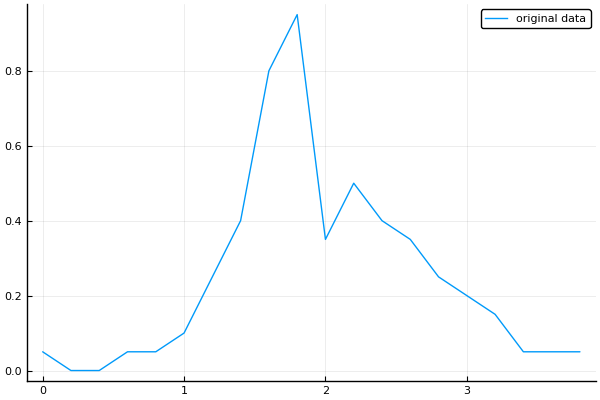

In [26]:
plot(xs,ys,label = "original data")

this reminds me of the general shape of a normal distribution

In [27]:
function normal(x,mean,std) #i named it normal not f because f was previously assigned to function in ex. 3 
    constant = 1/(2*pi*std)
    exponent_argument = -((x-mean)^2)/(2*std^2)
    return constant*(MathConstants.e)^exponent_argument
end

normal (generic function with 1 method)

Question 4.3)

In [28]:
function loss(xvals,yvals,mean,std)
    loss = 0.0
    predicted_ys = [normal(xvals[i],mean,std) for i in 1:length(xvals)]
    for i in 1:length(xvals)
        loss += (predicted_ys[i]-yvals[i])^2
    end
    return loss
end

loss (generic function with 1 method)

Question 4.4)

In [29]:
mean_0 = 0.0
std_0 = 1.0
#model the data as normal with mean = 0 and std = 1, find minimum loss function
#function we are minimizing is the loss function

loss_function = (mean,std) -> loss(xs,ys,mean,std)

#i used more steps because since the initial guess is so far off, more steps are needed to reach a minimum
results = gradient_descent_2d(loss_function,mean_0,std_0,10000)

10000-element Array{Tuple{Float64,Float64},1}:
 (0.0, 1.0)
 (0.005580410754397036, 1.0082981332727434)
 (0.011254442264349917, 1.0165325346732135)
 (0.017020949680966013, 1.0247024423969342)
 (0.022878852919682398, 1.0328070688316218)
 (0.028827131325446596, 1.0408456000412096)
 (0.034864818635893496, 1.0488171953609224)
 (0.040990998217299374, 1.0567209870925134)
 (0.04720479854990006, 1.064556080290847)
 (0.05350538894092186, 1.0723215526347911)
 (0.05989197544537163, 1.0800164543769306)
 (0.06636379697626246, 1.087639808367944)
 (0.0729201215875105, 1.0951906101526516)
 ⋮
 (1.6664386490128638, 0.17414234236081205)
 (1.6746172753808528, 0.17989647745940282)
 (1.6664386490128638, 0.17414234236081205)
 (1.6746172753808528, 0.17989647745940282)
 (1.6664386490128638, 0.17414234236081205)
 (1.6746172753808528, 0.17989647745940282)
 (1.6664386490128638, 0.17414234236081205)
 (1.6746172753808528, 0.17989647745940282)
 (1.6664386490128638, 0.17414234236081205)
 (1.6746172753808528, 0.1798964

the final values i found were mean = 1.67 and std = 1.80

In [30]:
@manipulate for step in 1:1000
    plot(xs,ys,label = "original data")
    
    step_mean = results[step][1]
    step_std = results[step][2]
    
    g = x -> normal(x,step_mean,step_std)
    plot!(g,label="normal fit")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["step"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 1000,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
500, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000137504fd0, Task (runnable) @0x0000000137504fd0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"3

**Question 5**

Question 5.1-5.2)

In [36]:
my_data = CSV.read("my_data.csv")
ts = my_data[:,1]
Ss = my_data[:,2]
Is = my_data[:,3]
Rs = my_data[:,4];

Question 5.3)

In [114]:
function loss(beta,gamma)
    
    #calculate solution given beta and gamma
    
    num_agents = 100 #from pset4
    stepsize = 00001
    
    
    s0 = Ss[1]/num_agents
    i0 = Is[1]/num_agents
    r0 = Rs[1]/num_agents
    
    s_traj,i_traj,r_traj,t_traj = euler_SIR(beta,gamma,s0,i0,r0,stepsize,ts[end])
    
    #find appropriate t value and compare loss 
    pred_s = [s_traj[t_index(i,stepsize)] for i in 1:length(ts)].*num_agents
    pred_i = [i_traj[t_index(i,stepsize)] for i in 1:length(ts)].*num_agents
    pred_r = [r_traj[t_index(i,stepsize)] for i in 1:length(ts)].*num_agents
    
    return pred_s,pred_i,pred_r,generic_loss(Ss,pred_s) + 2*generic_loss(Is,pred_i) + generic_loss(Rs,pred_r)
end

loss (generic function with 2 methods)

In [106]:
function t_index(t,stepsize) #if t is 43 and step size is 0.1, should return 43*10-1 as index
    index = floor(Int64, (t/stepsize) -1)
    if index == 0
        return 1
    else
        return index
    end
end

t_index (generic function with 1 method)

In [115]:
function generic_loss(data,predicted)
    loss = 0.0
    for i in 1:length(data)
        loss += (data[i]-predicted[i])^2
    end
    return loss
end

generic_loss (generic function with 1 method)

In [126]:
loss(0.2,0.1)[4]

332027.0849482535

Question 5.4)

In [137]:
loss_f = (beta,gamma) -> loss(beta,gamma)[4]
beta_0 = 0.1
gamma_0 = 0.1
num_steps = 15 

results = gradient_descent_2d(loss_f,beta_0,gamma_0,num_steps)

15-element Array{Tuple{Float64,Float64},1}:
 (0.1, 0.1)
 (0.10994990695938311, 0.09900032430277644)
 (0.11986508175709834, 0.09770059020275719)
 (0.12970918129372905, 0.09594169728023262)
 (0.1393975196856894, 0.09346458218341791)
 (0.14872048421456163, 0.08984763147966347)
 (0.1571546952808041, 0.08447510100603443)
 (0.16363290017571325, 0.07685717075303425)
 (0.16721593807998625, 0.06752112022957718)
 (0.16840706292410162, 0.05759231256673412)
 (0.16821105793179306, 0.047594233649112486)
 (0.16725775628259232, 0.037639776558661436)
 (0.16586318739887987, 0.02773749512312442)
 (0.16414393640563335, 0.01788639487887653)
 (0.16203722694434933, 0.00811082455046416)

In [139]:
@manipulate for step in 1:num_steps
    plot(Is,label="infected",c="red")
    plot!(Ss,label = "susceptible",c="yellow")
    plot!(Rs,label="recovered",c="green")
    
    trajs = loss(results[step][1],results[step][2])
    plot!(trajs[1],label = "susceptible model")
    plot!(trajs[2], label = "infected model")
    plot!(trajs[3], label = "recovered model")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["step"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 15,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
8, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000114708250, Task (runnable) @0x0000000114708250), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"15907505241440201157\",\"id\":\"ob_78\",\"typ